#  Simple Liner Regression

Problem Statement - In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

# Author - Prasad S. Lotke 

In [30]:
#importing all required liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
#reading data from remote link
url = "http://bit.ly/w-data"
sample_data=pd.read_csv(url)
print("Sample data read successfully")
sample_data.head(10)

Sample data read successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


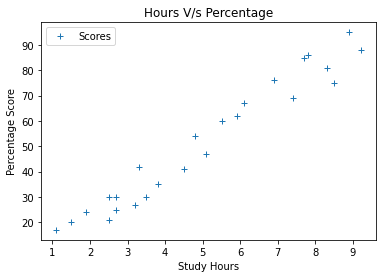

In [32]:
#plotting the distribution of the scores
sample_data.plot(x='Hours',y='Scores',style='+')
plt.title('Hours V/s Percentage')
plt.xlabel('Study Hours')
plt.ylabel('Percentage Score')
plt.show()

In [33]:
#checking correlation
sample_data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# Preparing data

In [34]:
x=sample_data.iloc[:,:-1].values
y=sample_data.iloc[:,-1].values

In [35]:
#splitting the data into training and testing data sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# Training of model

In [36]:
#training algorithm for model
from sklearn.linear_model import LinearRegression
R_model=LinearRegression()
R_model.fit(x_train,y_train)

LinearRegression()

# Making Predictions

In [37]:
y_predict=R_model.predict(x_test)
y_predict

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [38]:
# Comparing Actual vs Predicted values
x_test1=x_test.flatten() #for converting array in 1 dimension
dff=pd.DataFrame({'Hours':x_test1,'Actual score': y_test,'predicted_score': y_predict})
dff.head()

,Hours,Actual score,predicted_score
0,1.5,20,16.884145
1,3.2,27,33.732261
2,7.4,69,75.357018
3,2.5,30,26.794801
4,5.9,62,60.491033


In [39]:
#prediction for given data
score_pred = R_model.predict([[9.25]])
print("No of Hours = 9.25")
print("Predicted Score = {}".format(score_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737535


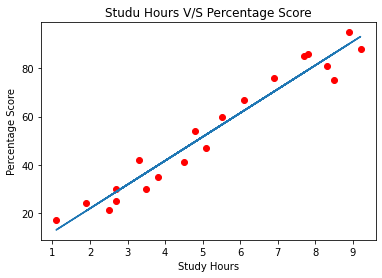

In [40]:
#visualizing predicted vs Actual values
plt.title("Studu Hours V/S Percentage Score")
plt.xlabel('Study Hours')
plt.ylabel('Percentage Score')
plt.scatter(x_train,y_train,c='r')
plt.plot(x_train,R_model.predict(x_train))

# Evaluating Model

In [41]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_predict)) 

Mean Absolute Error: 4.183859899002975
